Theory:

Based on animals population in an ecosystem.

Habitat Suitability index - > if population is high, HSI is high. This is the objective function. 

Probability of migration is high in high population ecosystem. THe less population, the high migratibility. 

Immigration (to) import (I)

Emigration (from) export (E)

Smax is the highest HSI

Emigration Rate (Mu)

Immigration Rate (Lambda)

SIV -> Suitability index Variable - > like chromosomes in Genetic Algorithm.

BBO Algorithm Steps:

        1- Produce a set of randomized biography population (Initial population) and sort.
        2- Determine mu and lambda based on rank of biography population.
        3- For each biography place repeat:
                4- for each SIV like k in biography place i do:
                        5- with lambda i prob, changes will apply in xik.
                                6- Determine origin of immigration by mu and randomized -> j.
                                7- do the immigration from xjk to xik.
                                8- with certain probability mutation will be applied on xik.

        9- Evaluate mew achieved biography places.
        10- Merge original population and migrated driven population and create new population for new iteration (Merge,Sort and Truncate populations, or predefined shares.)
        11- If end criteria is not met yet, return to the step 3.



In [230]:
#Import libraries
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import copy

In [231]:
#function definition to be optimized
def sphere(x):
    return sum(np.power(x,2))

In [232]:
#Problem Definition

varSize = 3    #number of decision variables
varMin = -20    #decision variable lower bound
varMax = 20    #decision variable upper bound

def costFunction(x):
    return sphere(x)

In [233]:
#BBo Parameters
maxIt = 100     #maximum number od iteration
nPop = 50       #number of habitats (population size)
keepRate = 0.2  #Keep Rate
nKeep = int(round(keepRate * nPop,0))  #number of kept habitats
nNew = int(nPop - nKeep  )   #Number of new habitats

#Migration Rate
mu = np.linspace(1,0,nPop)  #Emigration Rates
lambdas = 1- mu     #immigration Rates

alpha = 0.75
pMutation = 0.1
sigma = 0.02 * (varMax - varMin)

In [234]:
#Initialization

#Habitat
popHabitat_positions  = []
popHabitat_costs  = []
for i in range(nPop):
    position = np.random.uniform(varMin,varMax,varSize).tolist()
    popHabitat_positions.append(position)

    cost = costFunction(position)
    popHabitat_costs.append(cost)

#SortPopulation
sortOrder = np.argsort(popHabitat_costs)
popHabitat_positions = [popHabitat_positions[x] for x in sortOrder]
popHabitat_costs = [popHabitat_costs[x] for x in sortOrder]

#Best Solution ever found
bestSol_position = popHabitat_positions[0]
bestSol_cost = popHabitat_costs[0]

#List of best costs in iteration
BestCost = []


In [235]:
def roulettWheelSelection(P):
    rNum = rd.random()
    C = np.cumsum(P)
    return min(np.where(rNum <= C)[0])

In [240]:
#BBo Main loop
for it in range(maxIt):
    #Migration
    newPopPosition = copy.deepcopy(popHabitat_positions)
    newPopCost =  copy.deepcopy(popHabitat_costs)
    for i in range(nPop):
        for k in range(varSize):
            if rd.random() <= lambdas[i]:
                # Emigration probabilities
                E_prob = copy.deepcopy(mu)
                E_prob[i] = 0
                E_prob = E_prob / sum(E_prob)

                #Select source habitat
                j = roulettWheelSelection(E_prob)

                #Migration Rule
                newPopPosition[i][k] = popHabitat_positions[i][k] + alpha * (popHabitat_positions[j][k] - newPopPosition[i][k])

            #Mutation
            if rd.random() <= pMutation:
                #newPopPosition[i][k] = newPopPosition[i][k] + sigma * np.random.normal(0,1,1)[0]
                newPopPosition[i][k] =  np.random.normal(newPopPosition[i][k],sigma,1)[0]

        #Evaluation
        newPopCost[i] = costFunction(newPopPosition[i])

    #Sort new Population
    sortOrderNew = np.argsort(newPopCost)
    newPopPosition = [newPopPosition[x] for x in sortOrderNew]
    newPopCost = [newPopCost[x] for x in sortOrderNew]

    #Select next iteration population
    popHabitat_positions = popHabitat_positions[:nKeep] + newPopPosition[:nNew]
    popHabitat_costs = popHabitat_costs[:nKeep] + newPopCost[:nNew]

    #SortPopulation
    sortOrder = np.argsort(popHabitat_costs)
    popHabitat_positions = [popHabitat_positions[x] for x in sortOrder]
    popHabitat_costs = [popHabitat_costs[x] for x in sortOrder]

    #Update best solution ever found
    bestSol_position = popHabitat_positions[0]
    bestSol_cost = popHabitat_costs[0]

    #Store Best Cost ever Found
    BestCost.append(bestSol_cost)

    #Show Iteration Information
    print('Iteration ' + str(it) +": Best Cost = " + str(BestCost[it]))


Iteration 0: Best Cost = 24.318648450524893
Iteration 1: Best Cost = 15.346140445220671
Iteration 2: Best Cost = 5.2928428628657285
Iteration 3: Best Cost = 5.2928428628657285
Iteration 4: Best Cost = 1.203647153772194
Iteration 5: Best Cost = 1.203647153772194
Iteration 6: Best Cost = 0.817206935402237
Iteration 7: Best Cost = 0.19375584900622095
Iteration 8: Best Cost = 0.075257370301075
Iteration 9: Best Cost = 0.036111234613517416
Iteration 10: Best Cost = 0.02931043524054265
Iteration 11: Best Cost = 0.00593302101852225
Iteration 12: Best Cost = 0.0037375158615297614
Iteration 13: Best Cost = 0.0004965265301111218
Iteration 14: Best Cost = 0.0004965265301111218
Iteration 15: Best Cost = 0.0002987714381721785
Iteration 16: Best Cost = 0.0002987714381721785
Iteration 17: Best Cost = 0.00023942640316440618
Iteration 18: Best Cost = 3.089412728119465e-05
Iteration 19: Best Cost = 3.089412728119465e-05
Iteration 20: Best Cost = 3.089412728119465e-05
Iteration 21: Best Cost = 2.12421935

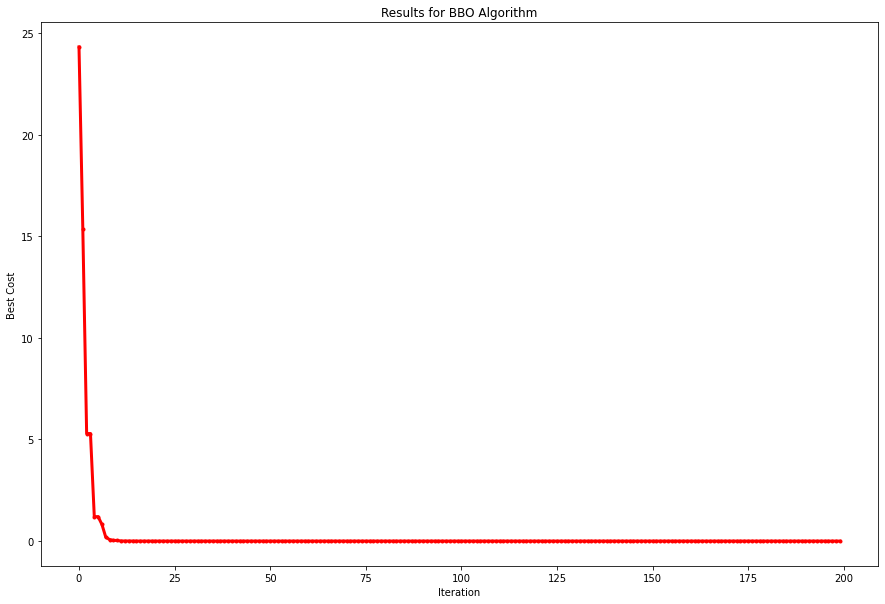

In [239]:
#Plot the cost results
plt.figure(figsize=(15, 10))
plt.plot(BestCost, 'ro-', label='Cost Results', linewidth=3, markersize=3)
plt.title('Results for BBO Algorithm')
plt.ylabel('Best Cost')
plt.xlabel('Iteration')
plt.show()